MICROSOFT AND THE MOVIE BUSINESS

Microsoft is one of the biggest companies in the world and this project has been undertaken to investigate and analyse the best way they can get into the movie business. Through data manipulation and analysis of various data sets of the top movies whether in terms of budget, ratings or profitability, Microsoft can be able to make an informed decision of how and with whom they will venture into the movie industry. The analysis below will enable them to have a reference point to back their decisions.

BUSINESS PROBLEM

With the vast economic and financial resources at Microsoft's disposal, it is only logical that the next step is to go into the movie industry so as to diversify their portfolio. This study will enable them to identify and settle on the most appropriate movies they will produce.

OBJECTIVES

The main goals of the project are:

1. Average production costs for a film


2. Revenue generated from the industry


3. Comparing studio perfomances

4. Characteristics of the most popular movies

5. Recommendations on how Microsoft should approach the film industry

With the vast economic and financial resources at Microsoft's disposal, it is only logical that the next step is to go into the movie industry so as to diversify their portfolio. This study will enable them to identify and settle on the most appropriate movies they will produce.

Let's dive straight into the objectives:

1. AVERAGE PRODUCTION COSTS FOR A FILM

Import the relevant libraries

In [22]:
import pandas as pd
import numpy as np
import sqlite3
import os

We use a variable name 'budget' to hold the csv files so we can conduct analysis on it.

In [23]:
budget = pd.read_csv('./datasets/tn.movie_budgets.csv')
# Set the first column as the index
budget.set_index(budget.columns[0], inplace=True)
budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


We begin by getting rid of the $ sign to enable numeric applications

In [24]:
budget['production_budget'] = pd.to_numeric(budget['production_budget'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
budget['worldwide_gross'] = pd.to_numeric(budget['worldwide_gross'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

Now we find the average production costs of the movies in this dataset.

In [25]:
average_production_budget = budget['production_budget'].mean()
average_production_budget

31587757.0965064

This shows that the average production budget for a film is $31,587,757.

2. REVENUE GENERATED FROM MOVIES

The data in the csv file shows production costs and the domestic/worldwide gross. This means we can get the net profit/loss of the movie. We will be using the worldwide gross since Microsoft is an international company and the worldwide_gross is inclusive of the domestic_gross.

In [26]:
# Create the revenue column
budget['revenue'] = budget['worldwide_gross'] - budget['production_budget']
budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209


Now we find out how much on average a movie can make.

In [27]:
average_revenue = budget['revenue'].mean()
average_revenue

59899703.80992736

This shows that the average movie makes a net profit of $59,899,703. This means that there is a high chance a moderately successful film can make double its production budget. 

It should be noted that there are also other expenses incurred when such as advertising that have not been mentioned so the film is not always assured to break even. Another important point to note is that the sample size taken for this study is quite small and consists mostly of moderatly successful films so the revenue margins can be biased.

A list of ten of the most profitable films is provided using the syntax below:

In [28]:
top_10_revenue = budget.nlargest(10, 'revenue')

# Display the top 10 revenue values
top_10_revenue.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224


The list above shows that the top 10 films had revenues of at least 1 billion dollars with the peak at roughly 2.35 billion dollars. This indicates that the film industry is quite large and can be a big branch of the Microsoft conglomerate if utilized correctly.

3. COMPARING STUDIO PERFORMANCES

This can be accessed using the bom.movie_csv file.

In [29]:
#Create a folder called gross to hold the data
gross = pd.read_csv('./datasets/bom.movie_gross.csv')
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Access the first few rows to get a look of the data and what it contains.

In [30]:
gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


Finding the top domestic grossing films

In [31]:
# Find the top domestic grossing films
top_domestic = gross.nlargest(30, 'domestic_gross')
print("Top Domestic Grossing Films:")
print(top_domestic[['title', 'domestic_gross', 'studio']])

Top Domestic Grossing Films:
                                            title  domestic_gross studio
1872                 Star Wars: The Force Awakens     936700000.0     BV
3080                                Black Panther     700100000.0     BV
3079                       Avengers: Infinity War     678800000.0     BV
1873                               Jurassic World     652300000.0   Uni.
727                         Marvel's The Avengers     623400000.0     BV
2758                     Star Wars: The Last Jedi     620200000.0     BV
3082                                Incredibles 2     608600000.0     BV
2323                 Rogue One: A Star Wars Story     532200000.0     BV
2759                  Beauty and the Beast (2017)     504000000.0     BV
2324                                 Finding Dory     486300000.0     BV
1875                      Avengers: Age of Ultron     459000000.0     BV
729                         The Dark Knight Rises     448100000.0     WB
1131              The 

Finding the top foreign_gross films

In [32]:
# Convert 'foreign_gross' to numeric
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'], errors='coerce')
top_foreign = gross.nlargest(30, 'foreign_gross')
# Display the top foreign grossing films
print("\nTop Foreign Grossing Films:")
print(top_foreign[['title', 'foreign_gross', 'studio']])


Top Foreign Grossing Films:
                                            title  foreign_gross   studio
328   Harry Potter and the Deathly Hallows Part 2    960500000.0       WB
1875                      Avengers: Age of Ultron    946400000.0       BV
727                         Marvel's The Avengers    895500000.0       BV
3081               Jurassic World: Fallen Kingdom    891800000.0     Uni.
1127                                       Frozen    875700000.0       BV
2764                               Wolf Warrior 2    867600000.0       HC
1477              Transformers: Age of Extinction    858600000.0     Par.
1876                                      Minions    823400000.0     Uni.
3083                                      Aquaman    812700000.0       WB
1128                                   Iron Man 3    805800000.0       BV
330   Pirates of the Caribbean: On Stranger Tides    804600000.0       BV
728                                       Skyfall    804200000.0     Sony
329      

We can also combine the two lists to find out which films appear in both lists. This will give an indication of movies that are doing well both domestically and internationally.

In [33]:
# Merge the two DataFrames on the 'title' column
merged_top_grossing = pd.merge(top_domestic, top_foreign, on='title', how='inner')

# Display the titles and corresponding gross values that appear in both lists
common_titles = merged_top_grossing.loc[:, ['title', 'domestic_gross_x', 'foreign_gross_x']]
common_titles.columns = ['title', 'domestic_gross', 'foreign_gross']

print("Titles that appear in both lists:")
print(common_titles)


Titles that appear in both lists:
                                          title  domestic_gross foreign_gross
0                                 Black Panther     700100000.0     646900000
1                         Marvel's The Avengers     623400000.0     895500000
2                      Star Wars: The Last Jedi     620200000.0     712400000
3                   Beauty and the Beast (2017)     504000000.0     759500000
4                       Avengers: Age of Ultron     459000000.0     946400000
5                         The Dark Knight Rises     448100000.0     636800000
6                Jurassic World: Fallen Kingdom     417700000.0     891800000
7                                   Toy Story 3     415000000.0     652000000
8                                    Iron Man 3     409000000.0     805800000
9                    Captain America: Civil War     408100000.0     745200000
10                                       Frozen     400700000.0     875700000
11  Harry Potter and the Death

The performance of the studios can be represented as a rank of the total foreign_gross of each studio

In [46]:
# Group by studio and year, summing the foreign gross
studio_performance = gross.groupby(['studio', 'year'])['foreign_gross'].sum().reset_index()

# Find the top 10 studios based on total foreign gross
top_studios = studio_performance.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(10).reset_index()

# Add a rank column based on total foreign gross
top_studios['rank'] = top_studios['foreign_gross'].rank(ascending=False, method='dense')

# Set display options to show full numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display the ranked list of top 10 studios
print(top_studios[['rank', 'studio', 'foreign_gross']])

    rank   studio   foreign_gross
0  1.000       BV 25793852199.000
1  2.000      Fox 20055866599.000
2  3.000       WB 18667902998.000
3  4.000     Uni. 16854767999.000
4  5.000     Sony 13945354998.000
5  6.000     Par. 11863384998.000
6  7.000  WB (NL)  6339000000.000
7  8.000      LGF  4482619300.000
8  9.000     P/DW  3393600000.000
9 10.000     LG/S  3353724000.000


4. CHARACTERISTICS OF THE MOST POPULAR MOVIES

Using the im.db database we can be able to get more information concerning the top rated films rather than the financial side. There are multiple attributes that come together to make a successful film. These are discussed below:

First we connect to the sqlite database and get the tables in this file.

In [34]:
# Connect to SQLite database 
conn = sqlite3.connect('./datasets/im.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()
# Query to get table names from sqlite_master table
cursor.execute("""SELECT name 
                      FROM sqlite_master 
                      WHERE type='table';""")

# Fetch all the table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table)


('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


We begin with an opening query to determine the columns in movie_basics.

In [35]:
first_query = '''
   SELECT *
   FROM movie_basics;
'''
pd.read_sql(first_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


We also look at the movie_ratings to find common columns for inter-relations.

In [36]:
second_query = '''
   SELECT *
   FROM movie_ratings;
'''
pd.read_sql(second_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


The next query is to find the top rated movies by ranking them via the movie_id.

In [37]:
third_query = '''
   SELECT movie_id, averagerating
   FROM movie_ratings
   ORDER BY averagerating DESC
   LIMIT 10;
'''
pd.read_sql(third_query, conn)

,movie_id,averagerating
0,tt5390098,10.0
1,tt6295832,10.0
2,tt1770682,10.0
3,tt2632430,10.0
4,tt8730716,10.0
5,tt4960818,10.0
6,tt6991826,10.0
7,tt10176328,10.0
8,tt4944240,10.0
9,tt5089804,10.0


We now have the movie_id but do not know anything about these top-rated films. The next query utilizes multiple tables from the database by linking them through their similar columns.

In [49]:
fourth_query = '''
   SELECT DISTINCT original_title, averagerating, genres, start_year, primary_name, primary_profession
   FROM movie_basics
   JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
   JOIN directors ON movie_ratings.movie_id = directors.movie_id
   JOIN persons ON directors.person_id = persons.person_id 
   ORDER BY averagerating DESC
   LIMIT 20;
'''
pd.read_sql(fourth_query, conn)

,original_title,averagerating,genres,start_year,primary_name,primary_profession
0,Exteriores: Mulheres Brasileiras na Diplomacia,10.000,Documentary,2018,Ivana Diniz,"director,writer"
1,Freeing Bernie Baran,10.000,"Crime,Documentary",2010,Daniel Alexander,director
2,Hercule contre Hermès,10.000,Documentary,2012,Mohamed Ulad-Mohand,"producer,director,writer"
3,I Was Born Yesterday!,10.000,Documentary,2015,Soudabeh Moradian,"director,editor,producer"
4,Dog Days in the Heartland,10.000,Drama,2017,Chad Carpenter,"director,producer,miscellaneous"
5,Revolution Food,10.000,Documentary,2015,Loreto Di Cesare,"cinematographer,director,producer"
6,Fly High: Story of the Disc Dog,10.000,Documentary,2019,Lindsay Thompson,"cinematographer,director,actress"
7,All Around Us,10.000,Documentary,2019,Tristan David Luciotti,"actor,writer,producer"
8,Atlas Mountain: Barbary Macaques - Childcaring...,10.000,Documentary,2015,Masahiro Hayakawa,"director,producer"
9,Atlas Mountain: Barbary Macaques - Childcaring...,10.000,Documentary,2015,Michael J. Sanderson,"cinematographer,camera_department,producer"


This clearly shows that among the top 20 movies, 17 of the 20 are documentary or part documentary genres. This means that documentary films are the films with the highest ratings making them a no-brainer among films that microsoft should produce. Drama films come at a distant second.


Even though not as relevant, 18 of the 20 films were also made in the last 10 years. This indicates a preference to newer movies.

Another important factor to note down is the list of directors of the 20 highly rated films. This will give the Microsoft team a top-layer pool of directors to choose from when deciding the film they'd like to produce.

RECOMMENDATIONS

1. The first recommendation is that if Microsoft should venture into films, they should seriously consider doing a documentary movie. The evidence is clear since more than 80% of the top 100 rated films were documentaries or part documentaries

This can be clearly shown by plotting the frequency of different genres of movies in the top 100.

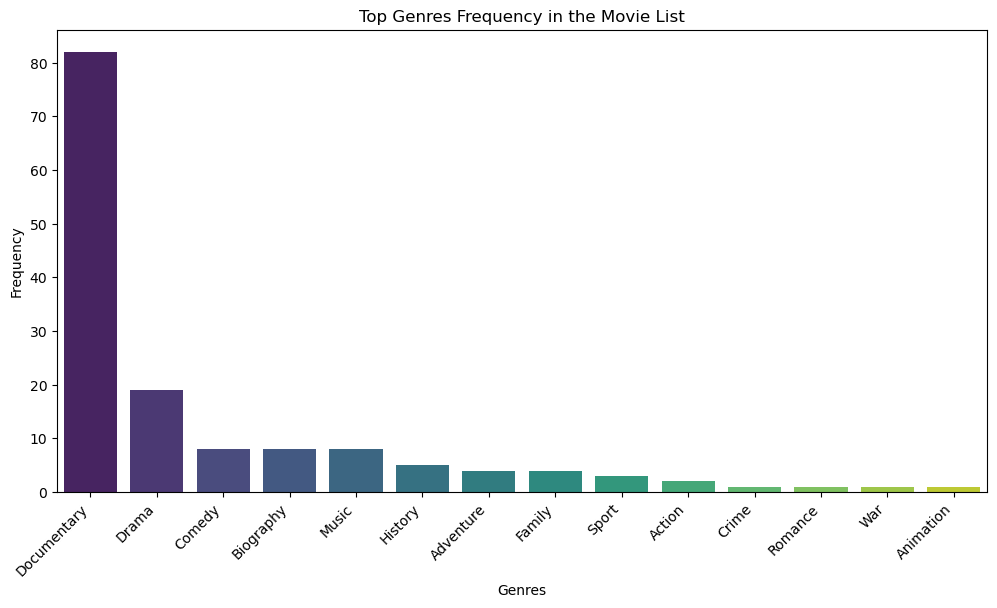

In [39]:
#import the relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

#We'll create another query so we can increase the list to 100 and have a larger sample size
fifth_query = '''
   SELECT DISTINCT original_title, averagerating, genres, start_year, primary_name, primary_profession
   FROM movie_basics
   JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
   JOIN directors ON movie_ratings.movie_id = directors.movie_id
   JOIN persons ON directors.person_id = persons.person_id 
   ORDER BY averagerating DESC
   LIMIT 100;
'''

df = pd.read_sql(fifth_query, conn)

# Split genres column into a list of genres
df['genres'] = df['genres'].str.split(',')

# Flatten the list of genres
genres_list = [genre for sublist in df['genres'].dropna() for genre in sublist]

# Create a DataFrame for counting genre frequencies
genres_df = pd.DataFrame(genres_list, columns=['Genre'])
genre_counts = genres_df['Genre'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top Genres Frequency in the Movie List')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

It is clear that documentaries dominate the top rated movies with dramas coming in second.

2. Another recommendation is to use either the BV, Universal or WB studio for film production. This can be illustrated better through the graph below that visualizes the studio performances over time.

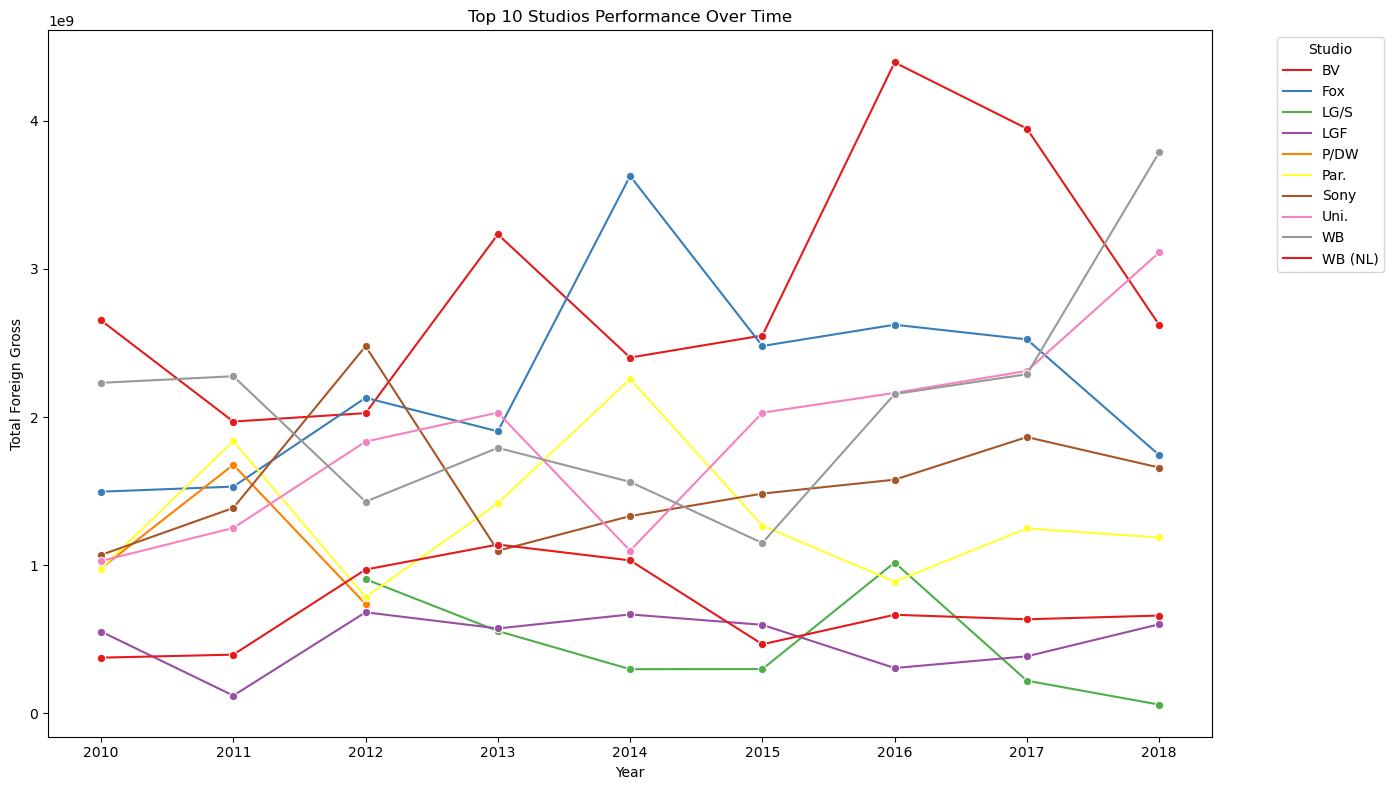

In [40]:



# Group by studio and year, summing the foreign gross
studio_performance = gross.groupby(['studio', 'year'])['foreign_gross'].sum().reset_index()

# Find the top 10 studios based on total foreign gross
top_studios = studio_performance.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False).head(10).index

# Filter the data for the top 10 studios
top_studio_performance = studio_performance[studio_performance['studio'].isin(top_studios)]
# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='foreign_gross', hue='studio', data=top_studio_performance, marker='o', palette='Set1')
plt.title('Top 10 Studios Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Total Foreign Gross')
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The plot above shows that BV studio has been among the leading foreign_gross earnings for studios in the last eight years despite a slight dip in the last two years. This makes it a high probability choice for studios to use

It is also important to note that Universal and WB have also experienced a gradual rise in total foreign_gross compared to other studios that have largely stagnated.

3. The pool of directors provided for the top movies(although most are documentaries) is a good place to start when considering  who to direct the films. The added advantage of some of them being not only directors but also writers, actors or even cinematographers can prove invaluable depending on the film.

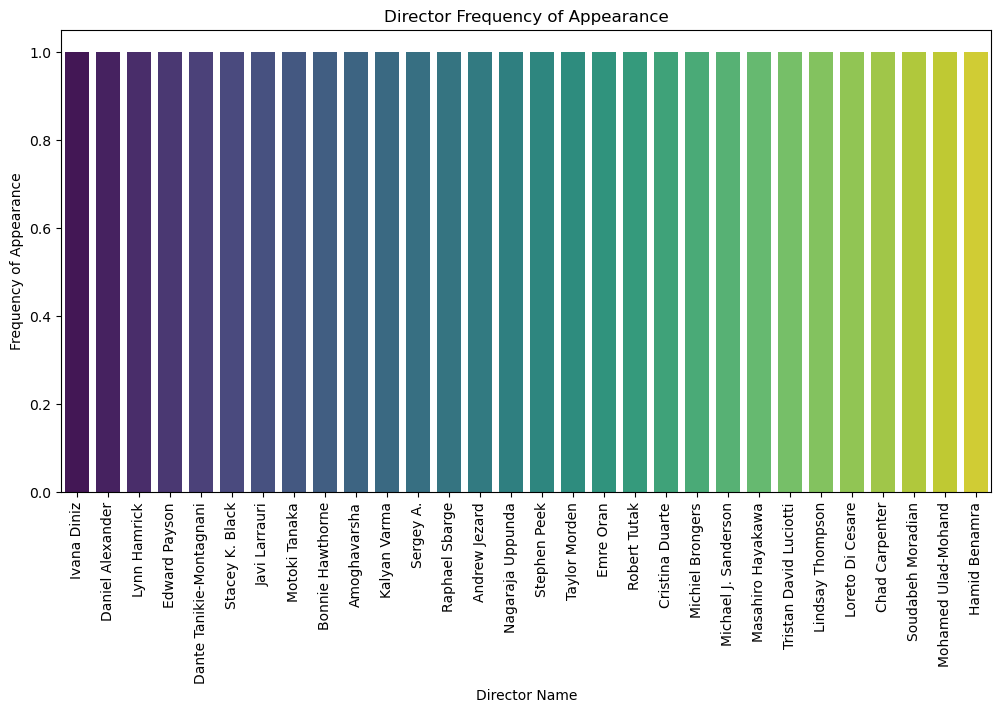

In [43]:
sixth_query = '''
   SELECT DISTINCT original_title, averagerating, genres, start_year, primary_name, primary_profession
   FROM movie_basics
   JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
   JOIN directors ON movie_ratings.movie_id = directors.movie_id
   JOIN persons ON directors.person_id = persons.person_id 
   ORDER BY averagerating DESC
   LIMIT 30;
'''
df1 = pd.read_sql(sixth_query, conn)

# Count the frequency of each director's appearance
director_frequency = df1['primary_name'].value_counts()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=director_frequency.index, y=director_frequency.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Director Frequency of Appearance')
plt.xlabel('Director Name')
plt.ylabel('Frequency of Appearance')
plt.show()

The graph below shows a graph of frequency of appearance of the directors of the top 30 films ranked according to their ratings. This list provides the top talented directors involved in the movie production industry.

CONCLUSION

Through the recommendations stated, an informed decison can be made about the choice of studio and genre of movie. This are the starting points to consider when venturing into the film business. However, we should also note some other key points that need to be taken into consideration when going into the idustry.

Microsoft should allocate a significant portion of their investment capital to production costs since the average movie costs about 31 million dollars excluding other expenses. This means that the movie business is a large-scale operation and if done well and under the right conditions can have huge returns evident by the minimum 1 billion dollars in profit for the top ten most profitable films.